In [45]:
import cv2
import numpy as np
from ipywidgets import widgets, interact, interactive_output, HBox, VBox
from matplotlib import pyplot as plt
%matplotlib widget

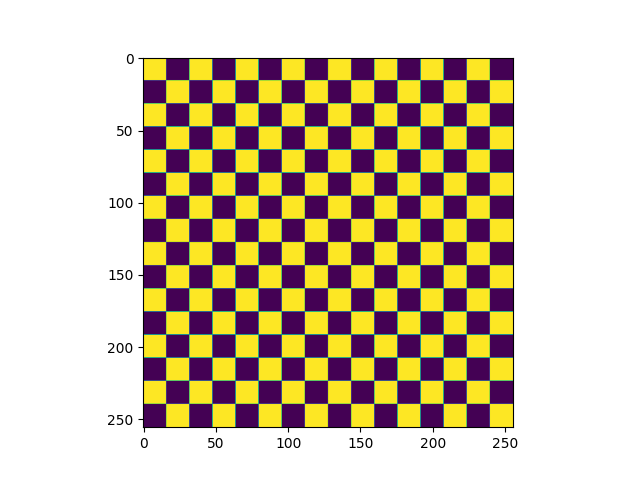

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)

In [7]:
def prepare_checker_img(H=256,W=256,s=16, plot_img:bool=False):
    img = np.zeros((H,W), np.float32)
    for iy in range(0,H,s):
        for ix in range(0,W,2*s):
            if (iy//s)%2==0:
                img[iy:iy+s,ix:ix+s] = 1.0
            else:
                img[iy:(iy+s),(ix+s):(ix+2*s)] = 1.0

    if plot_img:
        plt.imshow(img),plt.show()
        pass
    return img


# prepare_checker_img(plot_img=True)

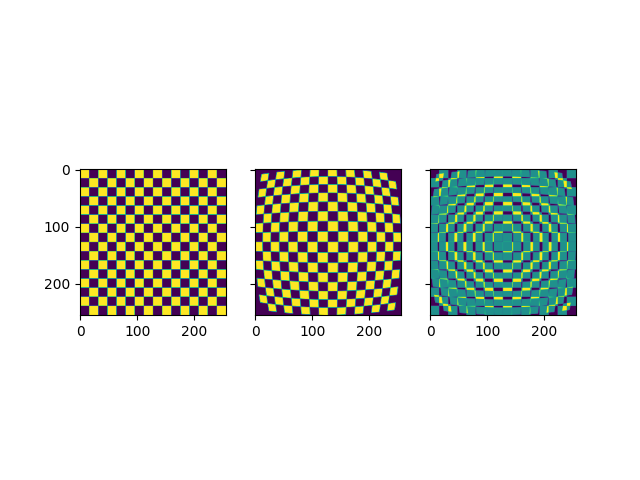

In [38]:
img = prepare_checker_img()
h,w = img.shape
mtx = np.eye(3)
mtx[0,2] = w/2
mtx[1,2] = h/2

mtx[0,0] = 1
mtx[1,1] = 0.9

dist = (0.00001,0,0,0)
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w-1,h-1), 1, (w,h))
#getOptimalNewCameraMatrix is causing 1 pixel shrink somehow. better to avoid it.

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

fig,axs=plt.subplots(1,3,sharex=True, sharey=True)
axs[0].imshow(img)
axs[1].imshow(dst)
axs[2].imshow(dst-img)
plt.show()


In [54]:
class Calib:
    def __init__(self) -> None:
        self.img = prepare_checker_img()
        self.out1 = widgets.Output(layout = {"border": "1px solid black"})
        with self.out1:
            self.fig,self.axs=plt.subplots(1,3,sharex=True, sharey=True)
        
    def undistort(self, fx,fy,cx,cy,k1,k2,k3,p1,p2):
        mtx = np.array([[fx,0,cx],[0,fy,cy],[0,0,1]], np.float32)
        dist= (k1,k2,p1,p2,k3)
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        self.out1.clear_output()
        with self.out1:
            self.axs[0].imshow(img)
            self.axs[1].imshow(dst)
            self.axs[2].imshow(dst-img)
            plt.show()

calib =Calib()

fx=widgets.FloatSlider(min=0.5, max=10, step=0.1, value=1.0, description='fx')
fy=widgets.FloatSlider(min=0.5, max=10, step=0.1, value=1.0, description='fy')
cx=widgets.FloatSlider(min=0, max=w, step=w/20, value=w/2, description='cx')
cy=widgets.FloatSlider(min=0, max=h, step=h/20, value=h/2, description='cy')
k1=widgets.FloatSlider(min=-0.00005, max=0.00005, step=0.000001, value=0.0, description='k1')
k2=widgets.FloatSlider(min=-0.000005, max=0.000005, step=0.000000001, value=0.0, description='k2')
k3=widgets.FloatSlider(min=-0.00005, max=0.00005, step=0.000001, value=0.0, description='k3')
p1=widgets.FloatSlider(min=-0.00005, max=0.00005, step=0.000001, value=0.0, description='p1')
p2=widgets.FloatSlider(min=-0.00005, max=0.00005, step=0.000001, value=0.0, description='p2')


out = interactive_output(calib.undistort, {'fx':fx,'fy':fy,'cx':cx,'cy':cy,'k1':k1,'k2':k2,'p1':p1,'p2':p2,'k3':k3})
display(VBox([HBox([fx,fy,cx,cy]),HBox([k1,k2,p1,p2,k3])]), calib.out1)


Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [13]:
roi

(0, 0, 245, 245)